<a href="https://colab.research.google.com/github/alexanderbandeiralira/DataAnalyticsMarketing/blob/main/DataAnalyticsMarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelo predição de Gastos de Usuário em um Site**

Com o uso de algoritmos de previsão, é possível estimar antecipadamente os gastos de um usuário em um site. Essa técnica é extremamente útil para a gestão de recursos e para a definição de estratégias de marketing. Com os dados gerados pelos usuários, é possível treinar o algoritmo para prever o comportamento futuro do usuário com base em seu histórico de navegação e compras anteriores.

Dessa forma, é possível tomar medidas preventivas para evitar que usuários com histórico de baixo gasto deixem o site sem realizar uma compra ou para oferecer promoções e campanhas de incentivo para aqueles que estão propensos a gastar mais. Além disso, a análise dos dados pode identificar padrões de comportamento que permitem ajustar a estratégia de vendas, melhorando a experiência do usuário e aumentando as vendas.

É importante destacar que a eficácia da previsão depende da qualidade e quantidade de dados coletados e da precisão do algoritmo utilizado. Com a evolução constante das técnicas de inteligência artificial, é possível melhorar continuamente a precisão das previsões e aprimorar a experiência do usuário no site.

#**Sobre os dados extraídos do google Analytics**

 Os dados foram extraídos do official merchandise store do ano de 2016 por meio do google Analytics.

O Google Analytics é uma ferramenta amplamente utilizada para rastrear e analisar o tráfego de sites. Se você possui uma loja virtual ou um site de comércio eletrônico, há muitos dados úteis que você pode extrair do Google Analytics para entender melhor o desempenho do seu negócio. Alguns exemplos de dados de comércio eletrônico que você pode encontrar no Google Analytics incluem:


*   Fontes de tráfego: o Google Analytics pode mostrar de onde vêm seus visitantes e quais canais estão gerando mais tráfego para sua loja virtual, como pesquisa orgânica, mídia social ou publicidade paga.

*   Comportamento do cliente: você pode ver como os clientes estão interagindo com sua loja virtual, incluindo informações como o tempo médio gasto no site, a taxa de rejeição e o número de páginas visualizadas por visita.


*   Localização geográfica: o Google Analytics pode fornecer informações sobre a localização geográfica dos seus clientes, o que pode ajudá-lo a entender se você precisa adaptar sua estratégia de marketing para diferentes regiões.



# **Perguntas possíveis aos dados**

Podemos levantar questões como,

- Como os algoritmos de previsão são treinados para estimar os gastos dos usuários?
- Quais são os principais dados que são utilizados na previsão de gastos dos usuários?
- Qual é a precisão das previsões de gastos dos usuários e como isso é avaliado?
- Como as empresas podem usar as previsões de gastos dos usuários para melhorar a experiência do cliente?
- Como as empresas podem evitar que usuários com histórico de baixo gasto deixem o site sem realizar uma compra?
- Como as empresas podem oferecer promoções e campanhas de incentivo para usuários propensos a gastar mais?
- Quais são as melhores práticas para coletar, analisar e utilizar os dados gerados pelos usuários em um site?
- Como a análise de dados pode ser usada para identificar padrões de comportamento dos usuários e ajustar a estratégia de vendas?


In [1]:
from google.colab import drive
drive.mount('/content/drive')

#/content/drive/MyDrive/Portfolio/Dados/train.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Carregamento de Pacotes**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

## **Carregando e conhecendo os Dados**

In [3]:
dados = pd.read_csv("/content/drive/MyDrive/Portfolio/Dados/train.csv")

In [4]:
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [5]:
dados.shape

(12283, 12)

In [6]:
dados.columns

Index(['channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
       'sessionId', 'socialEngagementType', 'totals', 'trafficSource',
       'visitId', 'visitNumber', 'visitStartTime'],
      dtype='object')

In [7]:
# Verificando o número de usuários por ID já que os dados são referentes a sessões e o mesmo usuário pode realizar mais de uma sessão.
len(dados.fullVisitorId.unique())

9996

In [8]:
# Será preciso mudar o tipo da data para object para separar os ano, mês e dia.
# Será preciso mudar o tipo da fullVisitorId e visitId também por ser uma chave. 
dados.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [9]:
# Ao invés de mudar o tipo, é mais recomendado recarregar os dados já que assim garantimos que não será perdido nenhum zero a esquerda.
dados = pd.read_csv("/content/drive/MyDrive/Portfolio/Dados/train.csv", dtype = {'date':object, 'fullVisitorId':object,'visitId':object})

In [10]:
dados.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

# **Exemplo de variáveis para entendermos o problema**

*   VisitorID - Id de usuário

*   VisitStartTime - Data e hora do acesso

*   VisitNumber - Número de visitas

*   Devide - Dispositivo que utilizou para acessar o site (smarthphone, notebook)

*   Channel - O Canal que foi utilizado para acessar (google por exemplo)

*   Duration - Tempo em minutos de acesso

*   Revenue - Gasto total



#**Observação sobre os dados de Marketing de vendas**


*   Muitas vezes os nossos dados são sobre sessões realizadas, então um único usuário pode ser visto mais de uma vez em nosso dataset, por isso é possível que antes de criarmos algum modelo de machine learning, precisemos criar variáveis sobre o nosso usuário.



In [11]:
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


**Obs: Podemos observar que device, geoNetwork, totals e trafficSource estão em formato str e para lidarmos com ela precisaremos utilizar o pacote json para transformar em dicionário.**

In [12]:
dados.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [13]:
json.loads(dados.device.iloc[0]) # Fica em formado amigável

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [14]:
pd.DataFrame([json.loads(linha) for linha in dados.device])

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [15]:
dicionarios = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [16]:
for coluna in dicionarios:
  dados = dados.join(pd.DataFrame([json.loads(linha) for linha in dados[coluna]]))

In [17]:
dados.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


In [18]:
dados.drop(dicionarios, axis=1, inplace=True)

In [19]:
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,transactionRevenue,campaign,source,medium,keyword,adwordsClickInfo,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,Data Share Promo,Partners,affiliate,NaN,{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN,NaN


In [20]:
len(dados.channelGrouping.unique())

8

**Verificar importancia das variáveis por variação de valores**

In [21]:
dados.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'browser', 'browserVersion', 'browserSize', 'operatingSystem',
       'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding',
       'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo',
       'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors',
       'screenResolution', 'deviceCategory', 'continent', 'subContinent',
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'visits', 'hits',
       'pageviews', 'bounces', 'newVisits', 'transactionRevenue', 'campaign',
       'source', 'medium', 'keyword', 'adwordsClickInfo', 'isTrueDirect',
       'referralPath', 'adContent', 'campaignCode'],
      dtype='object')

In [22]:
#for coluna in dados.columns:
#  print(coluna + ': ' + str(len(dados[coluna].unique())))

In [23]:
coluna

'trafficSource'

In [24]:
dados['adwordsClickInfo'][0] #Não temos informação nessa coluna

{'criteriaParameters': 'not available in demo dataset'}

In [25]:
dados.drop('adwordsClickInfo', axis = 1, inplace=True)

In [26]:
for coluna in dados.columns:
  print(coluna + ': ' + str(len(dados[coluna].unique())))

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2


###**Obs: Muitas variáveis tem somente 1 valor, então não trás informação alguma para o nosso modelo, por isso iremos excluir.**

In [27]:
coluna_na = []

In [28]:
coluna_na

[]

In [29]:
for coluna in dados.columns:
  print(coluna + ': ' + str(len(dados[coluna].unique())))
  if len(dados[coluna].unique()) == 1:
    coluna_na.append(coluna)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2


In [30]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [31]:
dados.drop(coluna_na, axis=1, inplace=True)

In [32]:
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1,NaN,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


##**Vamos escolher 4 variáveis para descrever o comportamento dos cliente apenas para termos em mãos um modelo de base:**

newVisits - Se é a primeira visita do usuário ou não (0 ou 1)
pageview - Quantas páginas o usuário viu naquela sessão
bounces - É a visita que não gera nenhuma interação. É como se fosse uma rejeição. Só mandou uma request para o google
hits - Volume de interação que o google recebeu do usuário.

In [33]:
dados.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId               object
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRevenue    object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
dtype: object

###As variáveis destacadas, pelas informações que precisamos delas devem ser int

In [34]:
quant = ['bounces','hits','newVisits','pageviews','transactionRevenue']

In [35]:
for coluna in quant:
  dados[coluna] = pd.to_numeric(dados[coluna])

In [36]:
dados.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                object
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
dtype: object

In [37]:
dados.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1.0,NaN,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,NaN,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1.0,NaN,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


##**Vamos tratar a variável resposta (Tem vários NaN mas talvez ao final, nem precisemos nos preocupar com isso)**





In [38]:
dados['transactionRevenue'].isna().sum()

12119

In [39]:
dados.shape

(12283, 31)

###**A maioria dos usuários não gastou nada e isso é bastante razoável**

In [40]:
dados['transactionRevenue'].fillna(0, inplace=True)

In [41]:
dados['transactionRevenue'].isna().sum()

0

In [42]:
dados['transactionRevenue'].value_counts()

0.0           12119
13590000.0        3
33590000.0        3
19190000.0        3
27190000.0        2
              ...  
24730000.0        1
6990000.0         1
14480000.0        1
95180000.0        1
25240000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

###**Os valores estão multiplicados por um expoente grande**

In [43]:
dados['transactionRevenue'] = dados['transactionRevenue'] / 1000000

In [44]:
dados['transactionRevenue'].value_counts() # Voltou ao normal

0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: transactionRevenue, Length: 147, dtype: int64

## **Criando variáveis que vão alimentar nosso modelo**

In [45]:
len(set(dados['fullVisitorId'])) # Número de usuários sem repetição
# Precisamos fazer um estudo por 'fullVisitorId'

9997

In [46]:
dados.groupby('fullVisitorId', as_index=False)[quant].sum()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0
...,...,...,...,...,...,...
9992,9996691020299725061,0.0,10,0.0,10,0.0
9993,9996793353803109760,1.0,1,1.0,1,0.0
9994,9997125062030599880,0.0,8,1.0,8,0.0
9995,9997464307347866920,1.0,1,1.0,1,0.0


In [47]:
dados_quant = dados.groupby('fullVisitorId', as_index=False)[quant].sum()

In [48]:
dados_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [49]:
dados_quant.shape

(9997, 6)

## **Train test split**

In [50]:
y = dados_quant.transactionRevenue.copy()

In [51]:
X = dados_quant.drop('transactionRevenue', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
reg = LinearRegression()

In [54]:
reg.fit(X_train, y_train)

LinearRegression()

In [55]:
reg_predict = reg.predict(X_test)

In [56]:
reg_predict 

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [57]:
resultados = pd.DataFrame()

In [58]:
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [59]:
resultados.head()

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655


In [60]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


In [61]:
(reg_predict - y_test)**2

4122    2.407650
4065    2.418675
1731    2.848421
4740    2.296715
6391    2.023948
          ...   
5580    2.156114
1074    2.969187
3063    2.602123
4554    2.331088
3616    2.500166
Name: transactionRevenue, Length: 3000, dtype: float64

##**MSE**

In [62]:
np.mean((reg_predict - y_test)**2)

807.2459296820928

##**RMSE**

In [63]:
np.sqrt(np.mean((reg_predict - y_test)**2))

28.412073660366516

In [64]:
np.sqrt(mean_squared_error(y_test, reg_predict))

28.412073660366516

In [65]:
np.mean(dados_quant.transactionRevenue) # Média de gastos em nossa base

1.778953686105832

In [66]:
np.std(dados_quant.transactionRevenue) # Desvio de gastos em nossa base

25.129905708016967

###**Nosso modelo está errando mais do que o desvio padrão, então está ruim**

#**Análises gráficas**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

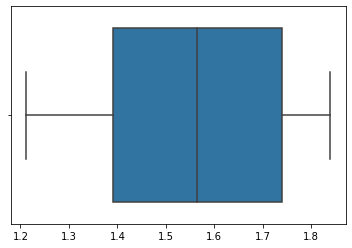

In [67]:
sns.boxplot(reg_predict)
# É possível ver aqui que os dados se distribuem como imaginamos olhando para a mediana e os intervalos dentro de valores muito parecidos

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transactionRevenue'>

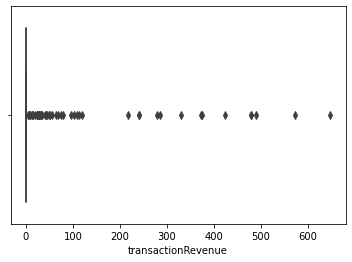

In [68]:
sns.boxplot(y_test)
# Bem diferente do que nosso modelo preveu que está bem conservador.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transactionRevenue', ylabel='Density'>

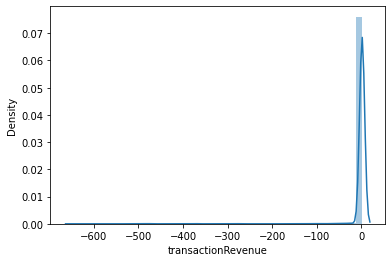

In [69]:
# Distribuição do erro
sns.distplot(reg_predict - y_test)

##**Precisamos inserir mais inteligencia para o nosso modelo com mais variáveis.**

In [70]:
visitas_ultima = dados.groupby('fullVisitorId', as_index=False) # Puxando a ultima visita do usuário que é a mais importante

In [71]:
visitas_ultima = visitas_ultima['visitNumber'].max()

In [72]:
visitas_ultima.head()


,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [73]:
usuarios_visitas_unicos = dados.drop_duplicates(subset=['fullVisitorId','visitNumber'])

In [74]:
usuarios_visitas_unicos.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,1.0,0.0,Data Share Promo,Partners,affiliate,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,NaN,0.0,(not set),google,organic,(not provided),True,NaN,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN


In [75]:
usuarios_visitas_unicos.shape

(12270, 31)

In [76]:
visitas = pd.merge(visitas_ultima,usuarios_visitas_unicos,left_on=['fullVisitorId','visitNumber'],
                  right_on=['fullVisitorId','visitNumber'],how='left')


In [77]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,newVisits,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,0.0,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [78]:
visitas.shape

(9997, 31)

##**Criando mais visitas**
Já pegamos a ultima, agora podemos pegar a primeira.

In [79]:
visitas_primeira = dados.groupby('fullVisitorId', as_index=False) # Puxando a ultima visita do usuário que é a mais importante

In [80]:
visitas_primeira = visitas_primeira['visitNumber'].min()

In [81]:
visitas_primeira.head() # Alguns usuários não vamos ter registrado a primeira visita

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [82]:
visitas_primeira.set_index('fullVisitorId', inplace=True) # Retirando o index

In [83]:
visitas_primeira.head()

,visitNumber
fullVisitorId,
0002365800130207040,1
0010286039787739137,1
0011056874471185769,1
0014443856125569702,1
0017260116665815114,6


In [84]:
visitas = visitas.join(visitas_primeira, how='left', on='fullVisitorId', rsuffix='_primeira')

In [85]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,transactionRevenue,campaign,source,medium,keyword,isTrueDirect,referralPath,adContent,campaignCode,visitNumber_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,0.0,(not set),(direct),(none),NaN,True,NaN,NaN,NaN,6


In [86]:
visitas = pd.merge(visitas,usuarios_visitas_unicos,left_on=['fullVisitorId','visitNumber_primeira'],
                  right_on=['fullVisitorId','visitNumber'],how='left', suffixes=['_ultima', '_primeira'])

In [87]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,newVisits_primeira,transactionRevenue_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,1.0,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,1.0,0.0,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,0.0,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [88]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [89]:
for coluna in quant:
  visitas.drop(coluna + '_ultima', axis=1, inplace = True)
  visitas.drop(coluna + '_primeira', axis=1, inplace = True)

In [90]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [91]:
ids = ['visitId_ultima','sessionId_ultima', 'visitId_primeira','sessionId_primeira']

In [92]:
visitas.drop(ids, axis=1, inplace=True)

In [93]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [94]:
# Retiras as colunas geográficas e deixar só o da ultima visita
visitas.columns

Index(['fullVisitorId', 'visitNumber_ultima', 'channelGrouping_ultima',
       'date_ultima', 'visitStartTime_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'isMobile_ultima', 'deviceCategory_ultima',
       'continent_ultima', 'subContinent_ultima', 'country_ultima',
       'region_ultima', 'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'visitNumber_primeira',
       'channelGrouping_primeira', 'date_primeira', 'visitNumber_primeira',
       'visitStartTime_primeira', 'browser_primeira',
       'operatingSystem_primeira', 'isMobile_primeira',
       'deviceCategory_primeira', 'continent_primeira',
       'subContinent_primeira', 'country_primeira', 'region_primeira',
       'metro_primeira', 'city_primeira', 'networkDomain_primeira',
       'campaign_primeira', 'source_primeira', 'mediu

In [95]:
geo = ['city_primeira', 'continent_primeira', 'country_primeira', 'metro_primeira', 'region_primeira', 'networkDomain_primeira', 'subContinent_primeira']

In [96]:
visitas.drop(geo, axis=1, inplace=True)

In [97]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [98]:
visitas = pd.merge(visitas,dados_quant,left_on=['fullVisitorId'],
                  right_on=['fullVisitorId'],how='left')

In [99]:
visitas.head()
# Vamos começar a puxar os start time das visitas dos usuários

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


In [100]:
visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira

In [101]:
# Puxar o número de visitar dos usuários 
visits = dados.groupby('fullVisitorId', as_index=False).count().visitNumber.values

In [102]:
visits

array([1, 1, 1, ..., 1, 1, 2])

In [103]:
visitas['visits'] = visits

In [104]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1


In [105]:
[data[0:4] for data in visitas.date_ultima]

['2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2016',
 '2016',
 '2017',
 '2016',
 '2017',
 '2017',
 '2017',
 '2016',
 '2016',
 '2016',
 '2017',
 '2016',
 '2017',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2016',
 '2017',
 '2017',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2016',
 '2017',
 '2016',
 '2016',
 '2017',
 '2017',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2016',
 '2017',
 '2016',
 '2016',
 '2017',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2016',
 '2017',
 '2016',
 '2017',
 '2016',
 '2017',
 '2017',
 '2016',
 '2016',
 '2017',
 '2016',
 '2017',
 '2016',
 '2017',
 '2017',
 '2017',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2016',
 '2017',
 '2016',
 '2017',
 '2017',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2016',
 '2017',
 '2016',
 '2017',
 

In [106]:
# Trabalhar com as datas
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [107]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,2,0.0,0,1,2017,4,20,2017,4,20


In [108]:
visitas.dtypes

fullVisitorId                object
visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
operatingSystem_ultima       object
isMobile_ultima                bool
deviceCategory_ultima        object
continent_ultima             object
subContinent_ultima          object
country_ultima               object
region_ultima                object
metro_ultima                 object
city_ultima                  object
networkDomain_ultima         object
campaign_ultima              object
source_ultima                object
medium_ultima                object
keyword_ultima               object
isTrueDirect_ultima          object
referralPath_ultima          object
adContent_ultima             object
campaignCode_ultima          object
visitNumber_primeira          int64
channelGrouping_primeira     object
date_primeira                object
visitNumber_primeira        

In [109]:
visitas.drop('fullVisitorId', axis=1, inplace=True)

In [110]:
y = visitas.transactionRevenue.copy()

In [111]:
X = visitas.drop('transactionRevenue', axis=1)

In [112]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,...,0.0,2,0,1,2017,4,20,2017,4,20


In [113]:
quali = visitas.dtypes[visitas.dtypes == object].keys()

In [114]:
quali

Index(['channelGrouping_ultima', 'date_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'deviceCategory_ultima', 'continent_ultima',
       'subContinent_ultima', 'country_ultima', 'region_ultima',
       'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'channelGrouping_primeira', 'date_primeira',
       'browser_primeira', 'operatingSystem_primeira',
       'deviceCategory_primeira', 'campaign_primeira', 'source_primeira',
       'medium_primeira', 'keyword_primeira', 'isTrueDirect_primeira',
       'referralPath_primeira', 'adContent_primeira', 'campaignCode_primeira'],
      dtype='object')

In [115]:
strings = list(X.operatingSystem_ultima.values.astype('str'))

In [116]:
lbl = LabelEncoder()

In [117]:
lbl.fit(strings)

LabelEncoder()

In [118]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9])

In [119]:
for coluna in quali:
  lbl = LabelEncoder()
  strings = list(X[coluna].values.astype('str'))
  lbl.fit(strings)
  X[coluna] = lbl.transform(strings)

# Codificando todas

In [120]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,...,0.0,2,0,1,2017,4,20,2017,4,20


## **Train test split versão final**

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
reg = LinearRegression()

In [123]:
reg.fit(X_train, y_train)

LinearRegression()

In [124]:
reg_predict = reg.predict(X_test)

In [125]:
reg_predict[reg_predict < 0] = 0

In [126]:
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [127]:
resultados.head()

,revenue,predict,erro
4122,0.0,0.000000,0.000000
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.252166,0.252166
6391,0.0,0.000000,0.000000


In [128]:
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [129]:
resultados.head()

,revenue,predict,erro
4122,0.0,0.000000,0.000000
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.252166,0.252166
6391,0.0,0.000000,0.000000


In [130]:
# Podemos ver que ele já saiu daquele viés de valores muito pequenos e temos casos que ele acertou bastante perto
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.433404,-18.056596
5928,74.85,36.159109,-38.690891
8361,424.50,18.357382,-406.142618
8612,55.99,16.275254,-39.714746
416,15.19,22.567065,7.377065
4077,5.97,15.110610,9.140610
8146,27.19,13.481257,-13.708743
4908,372.65,129.559286,-243.090714
9395,29.98,20.432344,-9.547656
8728,101.95,88.965223,-12.984777


In [131]:
np.sqrt(mean_squared_error(y_test, reg_predict))

25.059080483201733

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

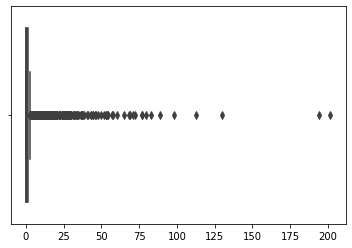

In [132]:
# Já temos uma distribuição das previsões bem mais próxima do que tinhamos visto anteriormente no nosso y_test
sns.boxplot(reg_predict)

#**Treinando um Gradient Boosting**

In [133]:
gb = GradientBoostingRegressor(random_state=42)

In [134]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [135]:
gb_predict = gb.predict(X_test)

In [136]:
gb_predict

array([ 0.02242292, -0.01680662, -0.02201891, ...,  0.32247215,
       -0.02453552, -0.02388993])

In [137]:
gb_predict[gb_predict < 0] = 0

In [138]:
resultados['revenue'] = y_test
resultados['predict'] = gb_predict
resultados['erro'] = gb_predict - y_test

In [139]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,45.423628,12.933628
5928,74.85,0.000000,-74.850000
8361,424.50,35.721105,-388.778895
8612,55.99,21.136136,-34.853864
416,15.19,17.679543,2.489543
4077,5.97,9.928129,3.958129
8146,27.19,26.180193,-1.009807
4908,372.65,47.853577,-324.796423
9395,29.98,16.881575,-13.098425
8728,101.95,176.065289,74.115289


In [140]:
np.sqrt(mean_squared_error(y_test, gb_predict))

23.10004349029805

##**Fizemos 3 modelos, o primeiro teve MSE = 28 o segundo MSE = 25 e o terceiro MSE = 23. Essas melhoras se deram por conta do aumento da quantidade de variáveis incluídas e melhorou ainda mais quando modificamos o tipo de algoritmo trabalhado para Gradient Boosting.**

##**O modelo gb está pronto para ser colocado em produção**